<a href="https://colab.research.google.com/github/citrus1998/nlp100/blob/main/nlp100_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!wget https://nlp100.github.io/data/ai.ja.zip

--2022-07-14 04:55:53--  https://nlp100.github.io/data/ai.ja.zip
Resolving nlp100.github.io (nlp100.github.io)... 185.199.109.153, 185.199.108.153, 185.199.111.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17516 (17K) [application/zip]
Saving to: ‘ai.ja.zip.1’

ai.ja.zip.1         100%[===================>]  17.11K  --.-KB/s    in 0s      

2022-07-14 04:55:53 (103 MB/s) - ‘ai.ja.zip.1’ saved [17516/17516]



In [22]:
!unzip ai.ja.zip

Archive:  ai.ja.zip
replace ai.ja.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ai.ja.txt               
  inflating: readme.ai.ja.md         


In [23]:
!apt install mecab libmecab-dev mecab-ipadic-utf8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libmecab-dev is already the newest version (0.996-5).
mecab is already the newest version (0.996-5).
mecab-ipadic-utf8 is already the newest version (2.7.0-20070801+main-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.


In [24]:
# CRF++のソースファイルのダウンロード・解凍・インストール
FILE_ID = "0B4y35FiV1wh7QVR6VXJ5dWExSTQ"
FILE_NAME = "crfpp.tar.gz"
!wget 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O $FILE_NAME
!tar xvf crfpp.tar.gz
%cd CRF++-0.58
!./configure && make && make install && ldconfig
%cd ..

--2022-07-14 05:00:14--  https://docs.google.com/uc?export=download&id=0B4y35FiV1wh7QVR6VXJ5dWExSTQ
Resolving docs.google.com (docs.google.com)... 142.250.65.78, 2607:f8b0:4004:832::200e
Connecting to docs.google.com (docs.google.com)|142.250.65.78|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/q7jn1uj9ff3g3jtmt1tuv3ham0js1rer/1657774800000/13553212398903315502/*/0B4y35FiV1wh7QVR6VXJ5dWExSTQ?e=download&uuid=3d98be88-540d-4b31-bf1e-3744f171cb49 [following]
--2022-07-14 05:00:18--  https://doc-08-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/q7jn1uj9ff3g3jtmt1tuv3ham0js1rer/1657774800000/13553212398903315502/*/0B4y35FiV1wh7QVR6VXJ5dWExSTQ?e=download&uuid=3d98be88-540d-4b31-bf1e-3744f171cb49
Resolving doc-08-74-docs.googleusercontent.com (doc-08-74-docs.googleusercontent.com)... 142.251.16.132, 2607:f8b0:4004:c17::84
Connecting to d

In [25]:
# CaboChaのソースファイルのダウンロード・解凍・インストール
FILE_ID = "0B4y35FiV1wh7SDd1Q1dUQkZQaUU"
FILE_NAME = "cabocha-0.69.tar.bz2"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt
!tar -xvf cabocha-0.69.tar.bz2
%cd cabocha-0.69
!./configure -with-charset=utf-8 && make && make check && make install && ldconfig
%cd ..

--2022-07-14 05:00:30--  https://docs.google.com/uc?export=download&confirm=t&id=0B4y35FiV1wh7SDd1Q1dUQkZQaUU
Resolving docs.google.com (docs.google.com)... 172.217.15.78, 2607:f8b0:4004:c17::65, 2607:f8b0:4004:c17::8b, ...
Connecting to docs.google.com (docs.google.com)|172.217.15.78|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lcv0dmamgp3p2mi2k8rvo1s00hbhbng1/1657774800000/13553212398903315502/*/0B4y35FiV1wh7SDd1Q1dUQkZQaUU?e=download&uuid=5bc127ef-dd47-4a02-9c44-a3bbe8a64baa [following]
--2022-07-14 05:00:30--  https://doc-04-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lcv0dmamgp3p2mi2k8rvo1s00hbhbng1/1657774800000/13553212398903315502/*/0B4y35FiV1wh7SDd1Q1dUQkZQaUU?e=download&uuid=5bc127ef-dd47-4a02-9c44-a3bbe8a64baa
Resolving doc-04-74-docs.googleusercontent.com (doc-04-74-docs.googleusercontent.com)... 142.251.16.132, 2

In [26]:
!cabocha -f1 -o ai.ja.txt.parsed ai.ja.txt 

In [27]:
!wc -l ./ai.ja.txt.parsed

11744 ./ai.ja.txt.parsed


#40. 係り受け解析結果の読み込み（形態素）
形態素を表すクラスMorphを実装せよ．このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．さらに，係り受け解析の結果（ai.ja.txt.parsed）を読み込み，各文をMorphオブジェクトのリストとして表現し，冒頭の説明文の形態素列を表示せよ．

In [28]:
class Morph():
  def __init__(self, m_list):
    spl_cxt = m_list[1].split(',')
    spl_cxt[-1] = spl_cxt[-1].replace('\n', '')
    self.surface = m_list[0]
    self.base = spl_cxt[6]
    self.pos = spl_cxt[0]
    self.pos1 = spl_cxt[1]
    #self.morph = {'surface': m_list[0], 'base': self.spl_cxt[6], 'pos': self.spl_cxt[0], 'pos1': self.spl_cxt[1]} 

In [29]:
filename = './ai.ja.txt.parsed'

sentences = []
morphs = []
with open(filename, 'r', encoding='utf-8') as f:
  for i, l in enumerate(f):
    if 'EOS\n' not in l:
      spl_l = l.split('\t')
      if spl_l[0] != '' and len(spl_l) == 2:
        morphs.append(Morph(spl_l))
    else:
      sentences.append(morphs)
      morphs = []
    
    #if i == 100:
    #  break

for m in sentences[2]:
  print(vars(m))

{'surface': '人工', 'base': '人工', 'pos': '名詞', 'pos1': '一般'}
{'surface': '知能', 'base': '知能', 'pos': '名詞', 'pos1': '一般'}
{'surface': '（', 'base': '（', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'じん', 'base': 'じん', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'こうち', 'base': 'こうち', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'のう', 'base': 'のう', 'pos': '助詞', 'pos1': '終助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': 'AI', 'base': '*', 'pos': '名詞', 'pos1': '一般'}
{'surface': '〈', 'base': '〈', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'エーアイ', 'base': '*', 'pos': '名詞', 'pos1': '固有名詞'}
{'surface': '〉', 'base': '〉', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': '）', 'base': '）', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': 'と', 'base': 'と', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '「', 'base': '「', 'pos': '記号', 'pos1': '括弧開'}
{'sur

#41. 係り受け解析結果の読み込み（文節・係り受け）
40に加えて，文節を表すクラスChunkを実装せよ．このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストの係り受け解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，冒頭の説明文の文節の文字列と係り先を表示せよ．本章の残りの問題では，ここで作ったプログラムを活用せよ．

In [30]:
import math

In [31]:
class Morph():
  def __init__(self, m_list):
    spl_cxt = m_list[1].split(',')
    spl_cxt[-1] = spl_cxt[-1].replace('\n', '')
    self.surface = m_list[0]
    self.base = spl_cxt[6]
    self.pos = spl_cxt[0]
    self.pos1 = spl_cxt[1]

In [32]:
class Chunk():
  def __init__(self, morphs, dst):
    self.morphs = morphs
    self.dst = dst
    self.srcs = []

In [33]:
# https://qiita.com/yamaru/items/48dcc527f433c22e0af9
class Sentence():
  def __init__(self, chunks):
    self.chunks = chunks
    for i, chunk in enumerate(self.chunks):
      if chunk.dst != None:
        self.chunks[chunk.dst].srcs.append(i)

In [34]:
filename = './ai.ja.txt.parsed'

sentences = []
chunks = []
morphs = []
with open(filename, mode='r') as f:
  for l in f:
    if l[0] == '*':
      if len(morphs) > 0:
        chunks.append(Chunk(morphs, dst))
        morphs = []
      dst = int(l.split(' ')[2].rstrip('D'))
    elif 'EOS\n' not in l:
      spl_l = l.split('\t')
      if spl_l[0] != '' and len(spl_l) == 2:
        morphs.append(Morph(spl_l))
    else:
      chunks.append(Chunk(morphs, dst))
      sentences.append(Sentence(chunks))
      morphs = []
      chunks = []
      dst = None

In [35]:
# https://qiita.com/yamaru/items/48dcc527f433c22e0af9
for chunk in sentences[2].chunks:
  print([morph.surface for morph in chunk.morphs], chunk.dst, chunk.srcs)

['人工', '知能'] 17 []
['（', 'じん', 'こうち', 'のう', '、', '、'] 17 []
['AI'] 3 []
['〈', 'エーアイ', '〉', '）', 'と', 'は', '、'] 17 [2]
['「', '『', '計算'] 5 []
['（', '）', '』', 'という'] 9 [4]
['概念', 'と'] 9 []
['『', 'コンピュータ'] 8 []
['（', '）', '』', 'という'] 9 [7]
['道具', 'を'] 10 [5, 6, 8]
['用い', 'て'] 12 [9]
['『', '知能', '』', 'を'] 12 []
['研究', 'する'] 13 [10, 11]
['計算', '機', '科学'] 14 [12]
['（', '）', 'の'] 15 [13]
['一', '分野', '」', 'を'] 16 [14]
['指す'] 17 [15]
['語', '。'] 34 [0, 1, 3, 16]
['「', '言語', 'の'] 20 []
['理解', 'や'] 20 []
['推論', '、'] 21 [18, 19]
['問題', '解決', 'など', 'の'] 22 [20]
['知的', '行動', 'を'] 24 [21]
['人間', 'に'] 24 []
['代わっ', 'て'] 26 [22, 23]
['コンピューター', 'に'] 26 []
['行わ', 'せる'] 27 [24, 25]
['技術', '」', '、', 'または', '、'] 34 [26]
['「', '計算', '機'] 29 []
['（', 'コンピュータ', '）', 'による'] 31 [28]
['知的', 'な'] 31 []
['情報処理', 'システム', 'の'] 33 [29, 30]
['設計', 'や'] 33 []
['実現', 'に関する'] 34 [31, 32]
['研究', '分野', '」', 'と', 'も'] 35 [17, 27, 33]
['さ', 'れる', '。'] -1 [34, 35]


#42. 係り元と係り先の文節の表示
係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [36]:
def list2str(lst):
  return ''.join(lst)

In [37]:
modifiers = []
modifiees = []
for chunk in sentences[2].chunks:
  if int(chunk.dst) != -1:
    modifier = []
    modifiee = []
    for morph in chunk.morphs:
      if morph.pos != '記号':
        modifier.append(morph.surface)
    for morph in sentences[2].chunks[int(chunk.dst)].morphs:
      if morph.pos != '記号':
        modifiee.append(morph.surface)
    modifiers.append(list2str(modifier))
    modifiees.append(list2str(modifiee))

for modifier, modifiee in zip(modifiers, modifiees):
  print(modifier, modifiee)

人工知能 語
じんこうちのう 語
AI エーアイとは
エーアイとは 語
計算 という
という 道具を
概念と 道具を
コンピュータ という
という 道具を
道具を 用いて
用いて 研究する
知能を 研究する
研究する 計算機科学
計算機科学 の
の 一分野を
一分野を 指す
指す 語
語 研究分野とも
言語の 推論
理解や 推論
推論 問題解決などの
問題解決などの 知的行動を
知的行動を 代わって
人間に 代わって
代わって 行わせる
コンピューターに 行わせる
行わせる 技術または
技術または 研究分野とも
計算機 コンピュータによる
コンピュータによる 情報処理システムの
知的な 情報処理システムの
情報処理システムの 実現に関する
設計や 実現に関する
実現に関する 研究分野とも
研究分野とも される


#43. 名詞を含む文節が動詞を含む文節に係るものを抽出
名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [38]:
def list2str(lst):
  return ''.join(lst)

In [39]:
modifiers = []
modifiees = []
for chunk in sentences[2].chunks:
  if int(chunk.dst) != -1:
    modifier = {}
    modifiee = {}
    for morph in chunk.morphs:
      if morph.pos != '記号':
        modifier[morph.surface] = morph.pos
    for morph in sentences[2].chunks[int(chunk.dst)].morphs:
      if morph.pos != '記号':
        modifiee[morph.surface] = morph.pos
    if '名詞' in list(modifier.values()) and '動詞' in list(modifiee.values()):
      modifiers.append(list2str(list(modifier.keys())))
      modifiees.append(list2str(list(modifiee.keys())))

for modifier, modifiee in zip(modifiers, modifiees):
  print(modifier, modifiee)

道具を 用いて
知能を 研究する
一分野を 指す
知的行動を 代わって
人間に 代わって
コンピューターに 行わせる
研究分野とも される


#44. 係り受け木の可視化
与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，Graphviz等を用いるとよい．

In [40]:
!apt install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.


In [41]:
import pydot
from IPython.display import Image,display_png
from graphviz import Digraph

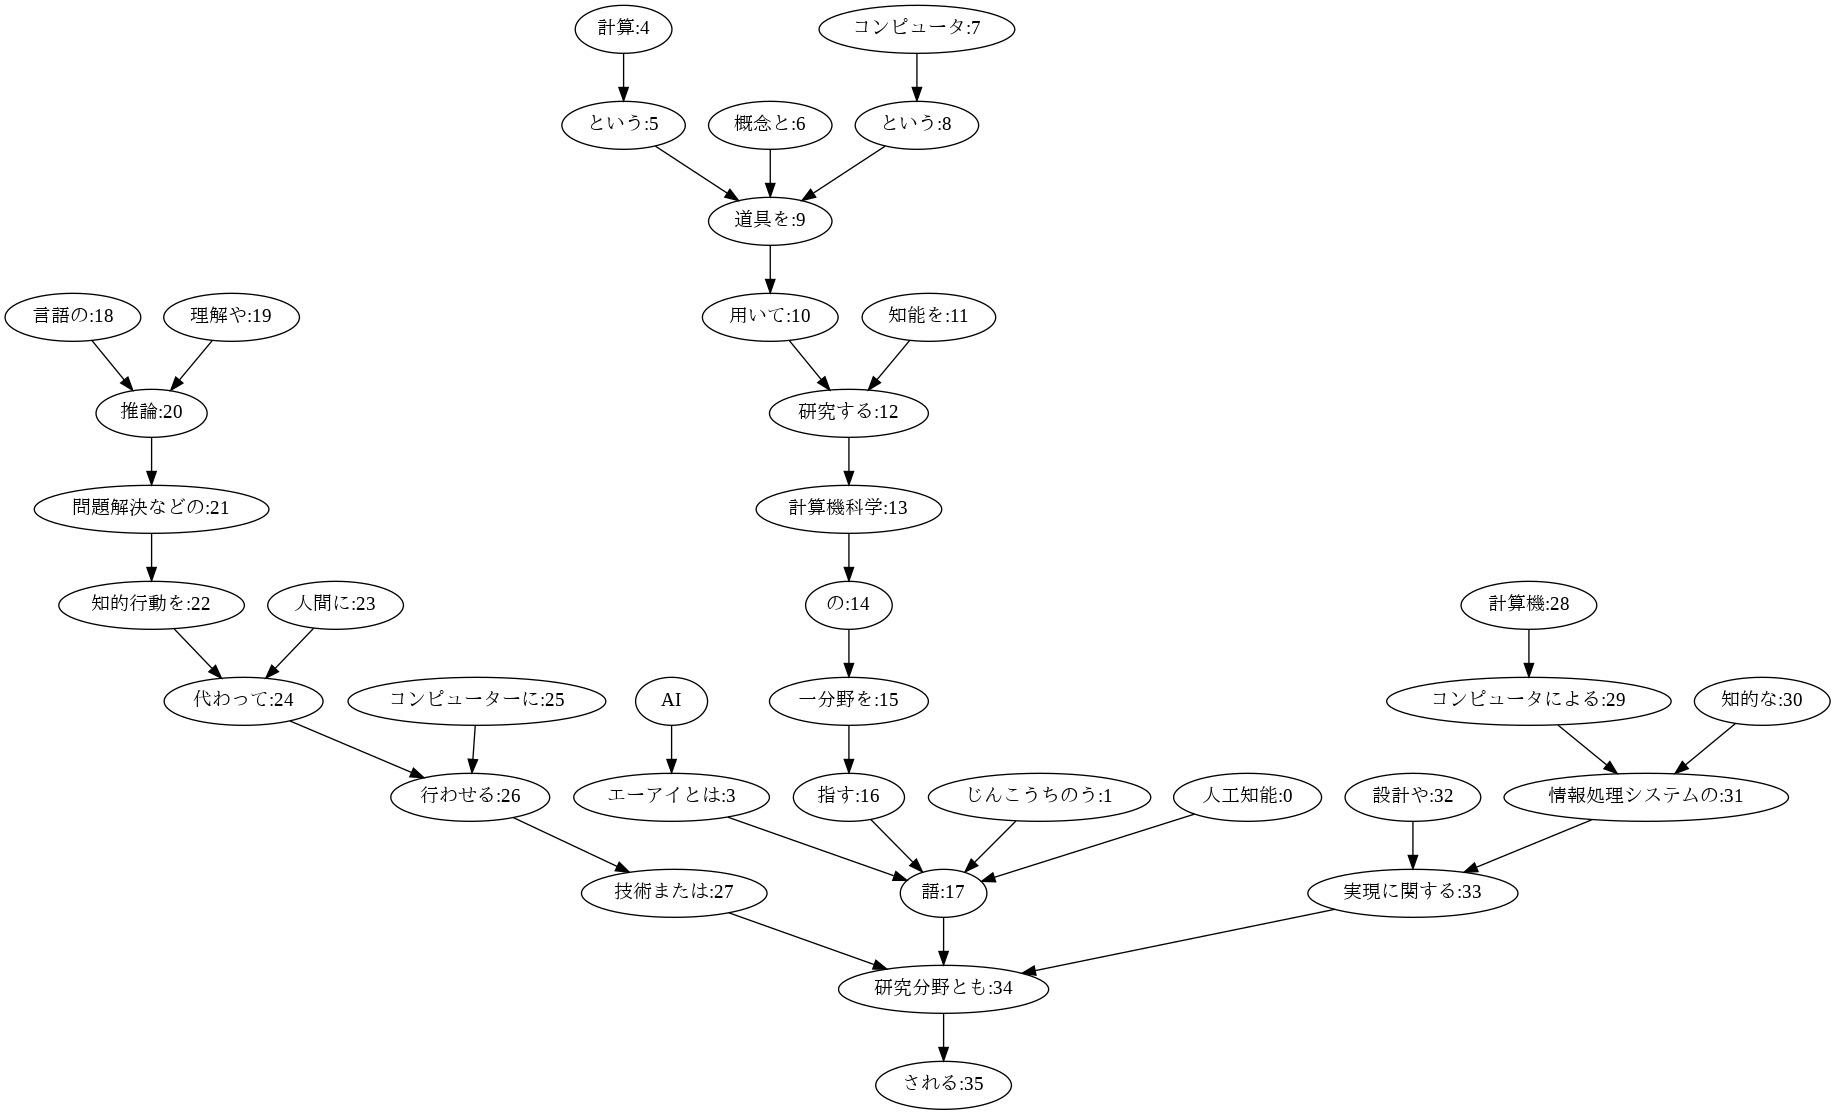

In [56]:
edges = []
for id, chunk in enumerate(sentences[2].chunks):
  if int(chunk.dst) != -1:
    modifier = []
    modifiee = []
    for morph in chunk.morphs:
      if morph.pos != '記号':
        modifier.append(morph.surface)
    modifier.append(':' + str(id))
    for morph in sentences[2].chunks[int(chunk.dst)].morphs:
      if morph.pos != '記号':
        modifiee.append(morph.surface)
    modifiee.append(':' + str(chunk.dst))
    edges.append([list2str(modifier), list2str(modifiee)])

node = pydot.Node('node')
graph = pydot.graph_from_edges(edges, directed=True)
graph.add_node(node)
Image(graph.create_png())

#45. 動詞の格パターンの抽出
今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい． 動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ． ただし，出力は以下の仕様を満たすようにせよ．

- 動詞を含む文節において，最左の動詞の基本形を述語とする
- 述語に係る助詞を格とする
- 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる  

「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．


`作り出す	で は を`

このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．

- コーパス中で頻出する述語と格パターンの組み合わせ
- 「行う」「なる」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）

In [53]:
with open('./casepattern.txt', 'w') as f:
  for chunk in sentences[2].chunks:
    for morph in chunk.morphs:
      print(morph)